In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train_titanic.csv') 

In [3]:
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])  # male=1, female=0
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'].astype(str))

In [4]:
# Handle missing values
imputer = SimpleImputer(strategy='mean')
df['Age'] = imputer.fit_transform(df[['Age']])
df['Fare'] = imputer.fit_transform(df[['Fare']])


In [5]:

# Features and target
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df['Survived']

In [6]:

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)


In [7]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [9]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train_scaled, y_train)


LogisticRegression()

=== Logistic Regression ===
Accuracy: 0.8324022346368715
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88       119
           1       0.79      0.68      0.73        60

    accuracy                           0.83       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.83      0.83      0.83       179



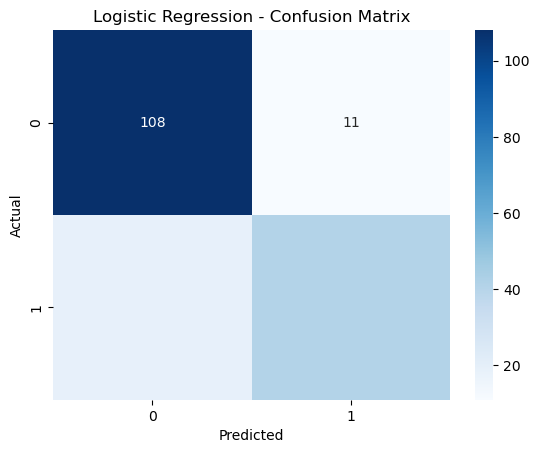

In [19]:
y_pred_lr = model_lr.predict(X_test_scaled)

print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, cmap='Blues', fmt='d')
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [21]:
from sklearn.svm import SVC

model_svc = SVC()
model_svc.fit(X_train_scaled, y_train)

SVC()

=== Support Vector Machine (SVC) ===
Accuracy: 0.8379888268156425
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.88       119
           1       0.83      0.65      0.73        60

    accuracy                           0.84       179
   macro avg       0.84      0.79      0.81       179
weighted avg       0.84      0.84      0.83       179



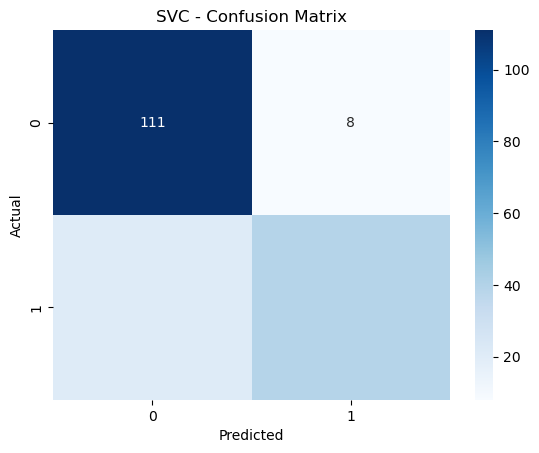

In [23]:
y_pred_svc = model_svc.predict(X_test_scaled)

print("=== Support Vector Machine (SVC) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_svc))
print("Classification Report:\n", classification_report(y_test, y_pred_svc))

cm_svc = confusion_matrix(y_test, y_pred_svc)
sns.heatmap(cm_svc, annot=True, cmap='Blues', fmt='d')
plt.title("SVC - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [25]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
model_knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

=== K-Nearest Neighbors ===
Accuracy: 0.8324022346368715
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.88       119
           1       0.77      0.72      0.74        60

    accuracy                           0.83       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.83      0.83      0.83       179



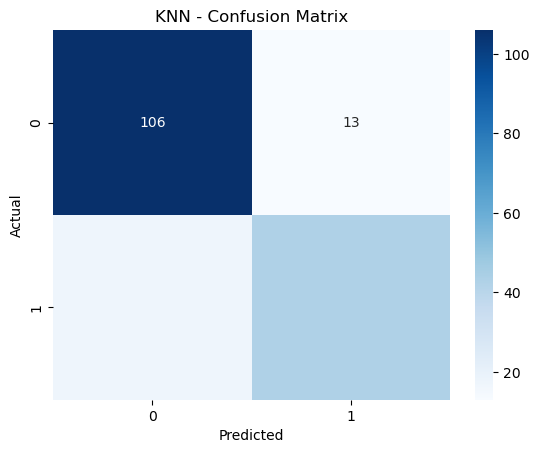

In [27]:
y_pred_knn = model_knn.predict(X_test_scaled)

print("=== K-Nearest Neighbors ===")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, cmap='Blues', fmt='d')
plt.title("KNN - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [29]:
from sklearn.naive_bayes import GaussianNB

model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train)

GaussianNB()

=== Gaussian Naive Bayes ===
Accuracy: 0.8212290502793296
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.87       119
           1       0.74      0.72      0.73        60

    accuracy                           0.82       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179



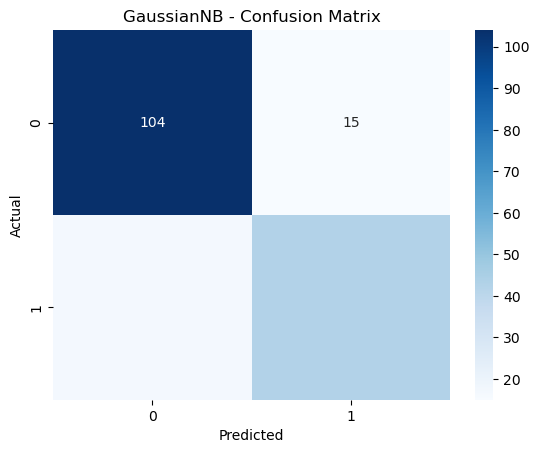

In [31]:
y_pred_gnb = model_gnb.predict(X_test)

print("=== Gaussian Naive Bayes ===")
print("Accuracy:", accuracy_score(y_test, y_pred_gnb))
print("Classification Report:\n", classification_report(y_test, y_pred_gnb))

cm_gnb = confusion_matrix(y_test, y_pred_gnb)
sns.heatmap(cm_gnb, annot=True, cmap='Blues', fmt='d')
plt.title("GaussianNB - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [33]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

=== Decision Tree Classifier ===
Accuracy: 0.8491620111731844
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89       119
           1       0.84      0.68      0.75        60

    accuracy                           0.85       179
   macro avg       0.85      0.81      0.82       179
weighted avg       0.85      0.85      0.84       179



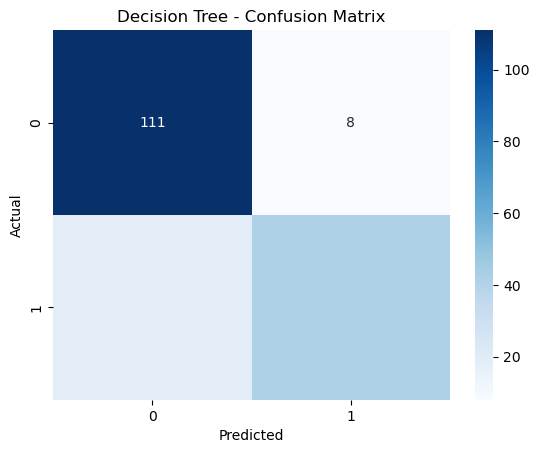

In [35]:
y_pred_dt = model_dt.predict(X_test)

print("=== Decision Tree Classifier ===")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, cmap='Blues', fmt='d')
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

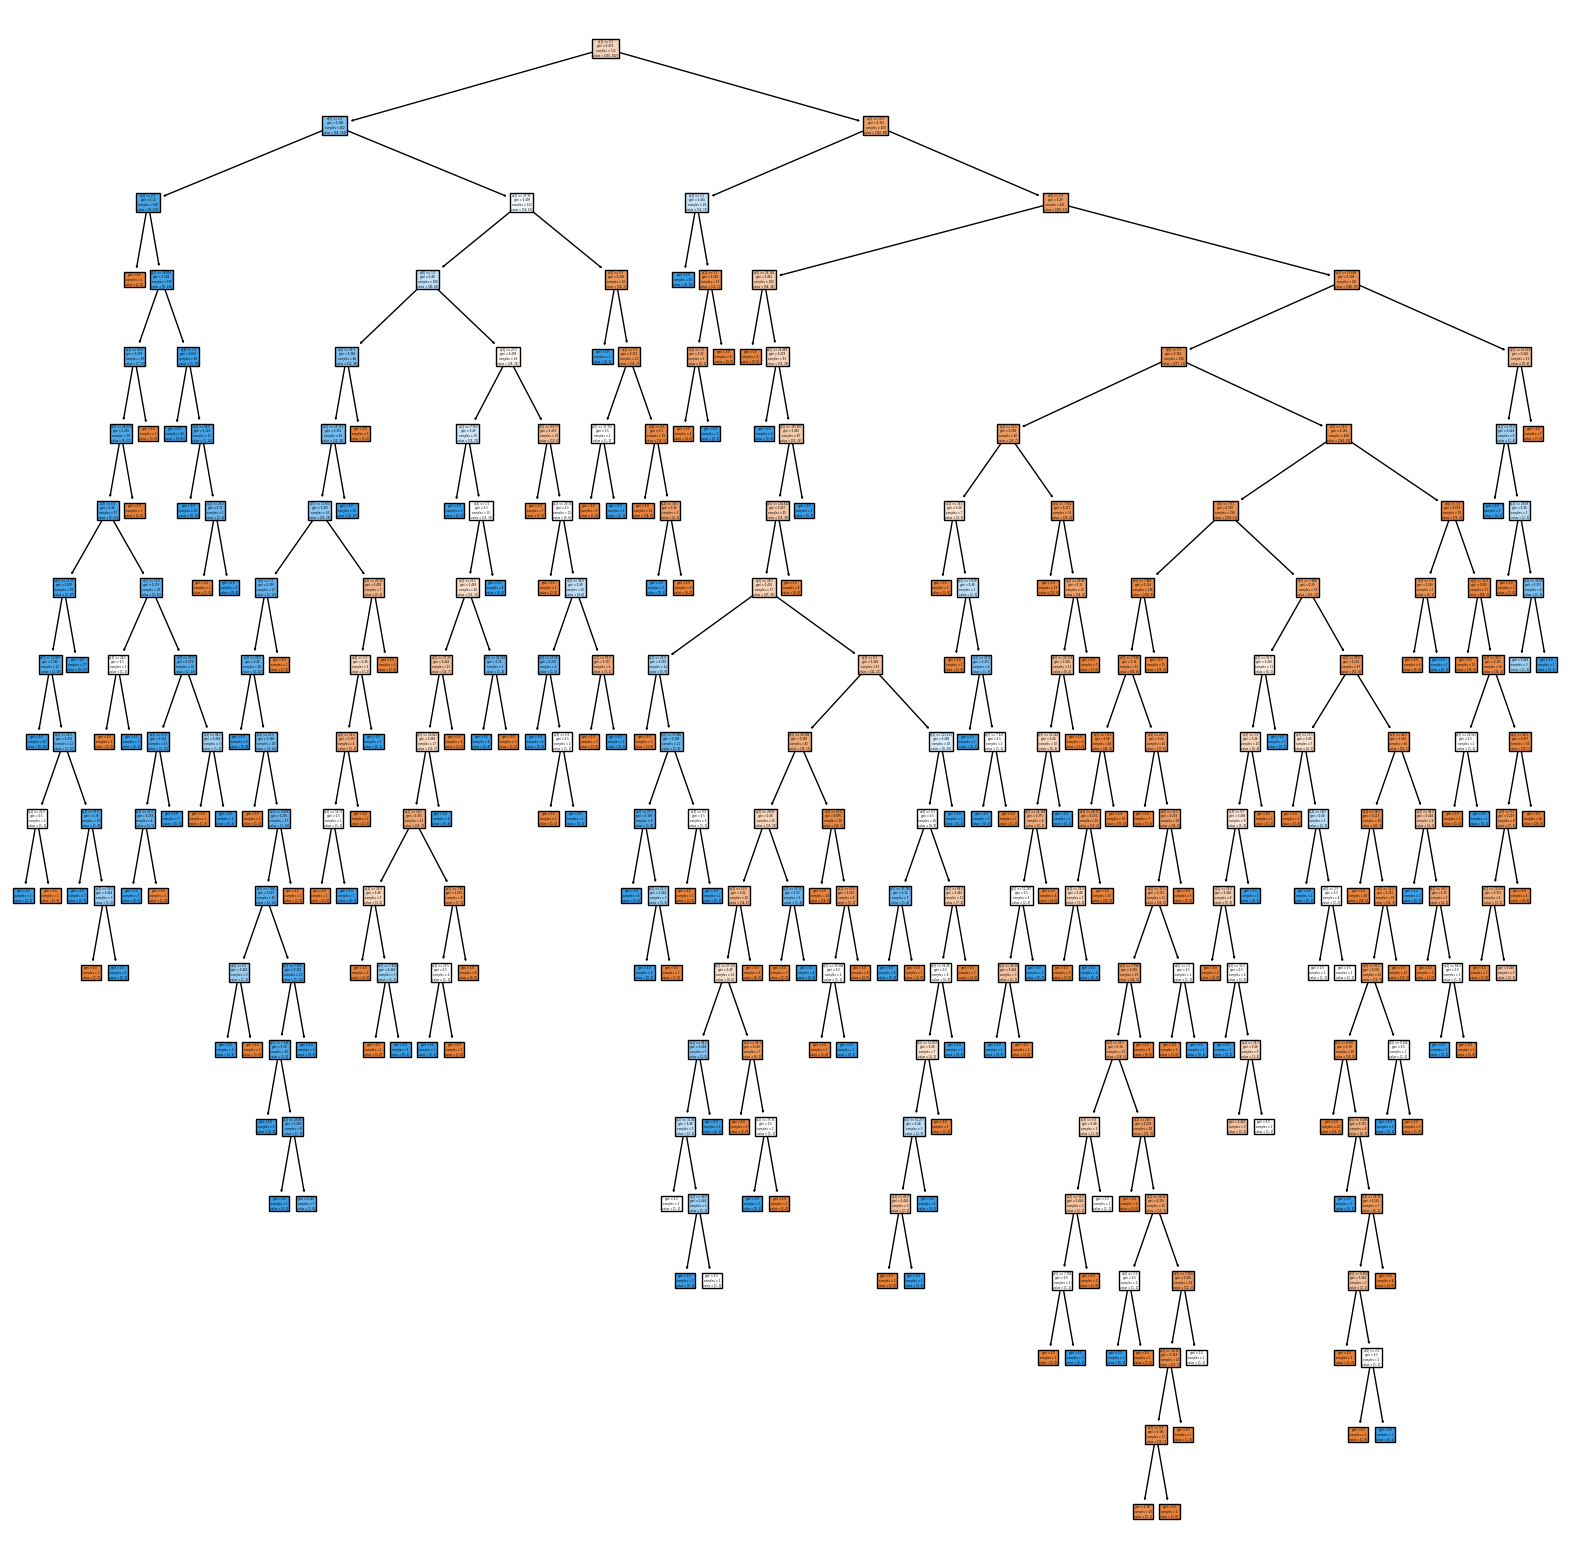

In [47]:
from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(model_dt,filled=True)
plt.show()